### Regression Exercise
# Moneyball The NBA

##### Import Our Libraries

In [ ]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt


# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [ ]:
# READ IN THE DATA USING PANDAS
df_1 = pd.read_csv('/content/drive/MyDrive/CTP_data/NBA_train.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/CTP_data/NBA_test.csv')

# DISPLAY THE FIRST 5 ROWS
df_1.head(5)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [ ]:
df_2.head(5)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,2013,Atlanta Hawks,1,44,8032,7999,3084,6644,2378,4743,706,1901,1158,1619,758,2593,2007,664,369,1219
1,2013,Brooklyn Nets,1,49,7944,7798,2942,6544,2314,4784,628,1760,1432,1958,1047,2460,1668,599,391,1206
2,2013,Charlotte Bobcats,0,21,7661,8418,2823,6649,2354,5250,469,1399,1546,2060,917,2389,1587,591,479,1153
3,2013,Chicago Bulls,1,45,7641,7615,2926,6698,2480,5433,446,1265,1343,1738,1026,2514,1886,588,417,1171
4,2013,Cleveland Cavaliers,0,24,7913,8297,2993,6901,2446,5320,547,1581,1380,1826,1004,2359,1694,647,334,1149


#### Inspect our data using `df.describe()` function.

In [ ]:
# Inspect our data using `df.describe()` function.
df_1.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [ ]:
df_2.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2013.0,0.500000,40.678571,8061.821429,8072.821429,3051.285714,6736.607143,2460.214286,5090.964286,591.071429,1645.642857,1368.178571,1818.571429,919.964286,2532.678571,1818.821429,640.392857,419.428571,1191.392857
std,0.0,0.509175,13.078265,338.940840,282.198256,108.952201,170.394605,133.085703,347.353858,118.700347,284.668776,167.057332,219.899881,107.620899,120.902487,118.686345,67.871523,73.159100,67.380258
min,2013.0,0.000000,20.000000,7640.000000,7319.000000,2823.000000,6348.000000,2105.000000,4318.000000,382.000000,1107.000000,1004.000000,1359.000000,666.000000,2359.000000,1579.000000,520.000000,294.000000,988.000000
25%,2013.0,0.000000,29.000000,7763.000000,7898.500000,2975.250000,6643.000000,2374.750000,4844.750000,511.500000,1469.250000,1297.750000,1695.000000,882.250000,2451.750000,1736.750000,590.250000,366.500000,1152.000000
50%,2013.0,0.500000,42.000000,8013.500000,8068.500000,3052.500000,6695.500000,2474.000000,5203.000000,584.500000,1608.000000,1357.000000,1786.000000,927.500000,2482.500000,1840.500000,653.500000,408.500000,1201.000000
75%,2013.0,1.000000,50.250000,8293.750000,8288.000000,3126.500000,6892.750000,2539.500000,5335.500000,659.250000,1761.000000,1439.750000,1905.500000,989.500000,2622.000000,1887.000000,686.250000,448.000000,1233.000000
max,2013.0,1.000000,66.000000,8704.000000,8619.000000,3339.000000,7197.000000,2818.000000,5572.000000,891.000000,2371.000000,1819.000000,2289.000000,1092.000000,2801.000000,2058.000000,784.000000,624.000000,1348.000000


#### Check for Nulls.

In [ ]:
# Check for Nulls.
df_1.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

In [ ]:
df_2.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [ ]:
# Check for Duplicates
df_1.duplicated().sum()

0

In [ ]:
df_2.duplicated().sum()

0

#### Build a function that will do this for you for any data frame you pass into it.

In [ ]:
def inspect_dataframe(input_df):
    print("First 5 elements: ")
    print(input_df.head(5))
    print('\n')

    print("Data description:")
    print(input_df.describe())
    print('\n')

    print("Number of null values: ")
    print(input_df.isnull().sum())
    print('\n')

    print("Number of duplicates: ")
    print(input_df.duplicated())
    print('\n')



inspect_dataframe(df_1)
inspect_dataframe(df_2)

First 5 elements: 
   SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0       1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1       1980       Boston Celtics         1  61  9303    8664  3617  7387   
2       1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3       1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4       1980       Denver Nuggets         0  30  8878    9240  3462  7470   

     2P   2PA   3P  3PA    FT   FTA   ORB   DRB   AST  STL  BLK   TOV  
0  3248  6952   13   75  2038  2645  1369  2406  1913  782  539  1495  
1  3455  6965  162  422  1907  2449  1227  2457  2198  809  308  1539  
2  3292  6668   70  275  2019  2592  1115  2465  2152  704  392  1684  
3  3775  7854   36  187  1702  2205  1307  2381  2108  764  342  1370  
4  3379  7215   83  255  1871  2539  1311  2524  2079  746  404  1533  


Data description:
         SeasonEnd    Playoffs           W           PTS        op

#### Get a sense of how many wins it will take to make the playoffs.
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

Text(0, 0.5, 'Team')

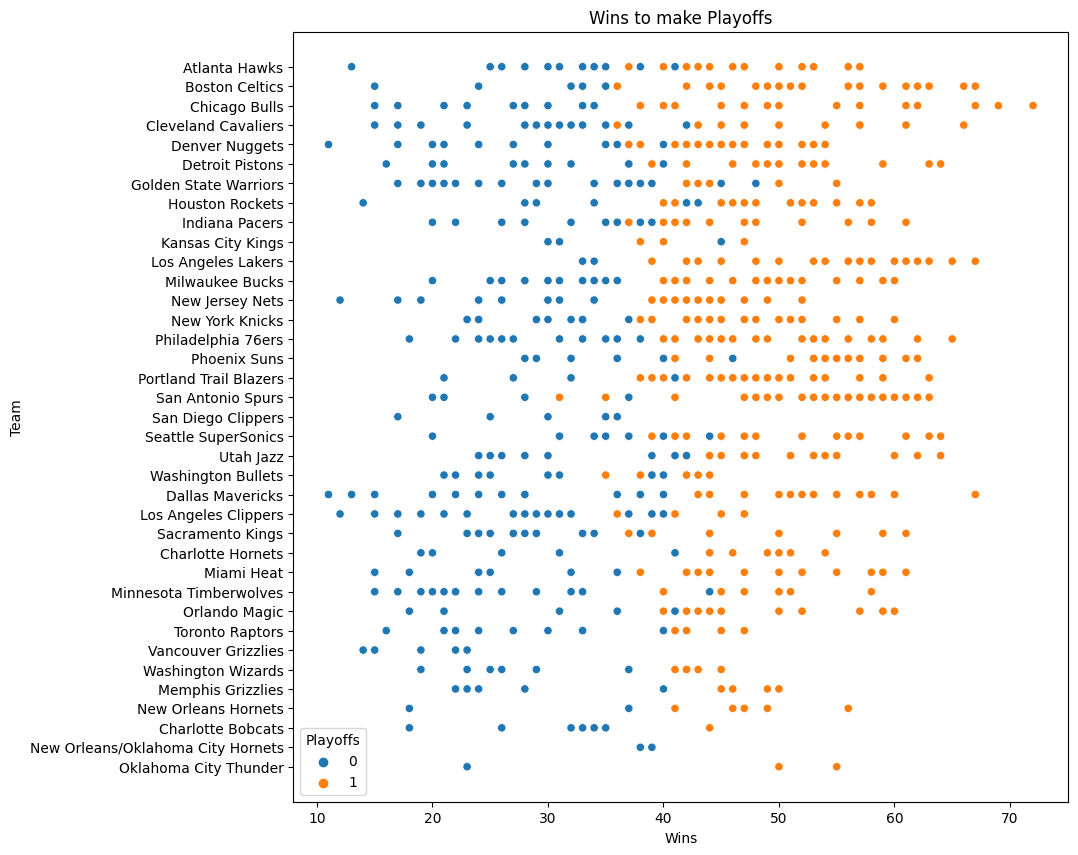

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='W',y='Team',hue='Playoffs', data=df_1)
plt.title('Wins to make Playoffs')
plt.xlabel('Wins')
plt.ylabel('Team')


Text(0, 0.5, 'Team')

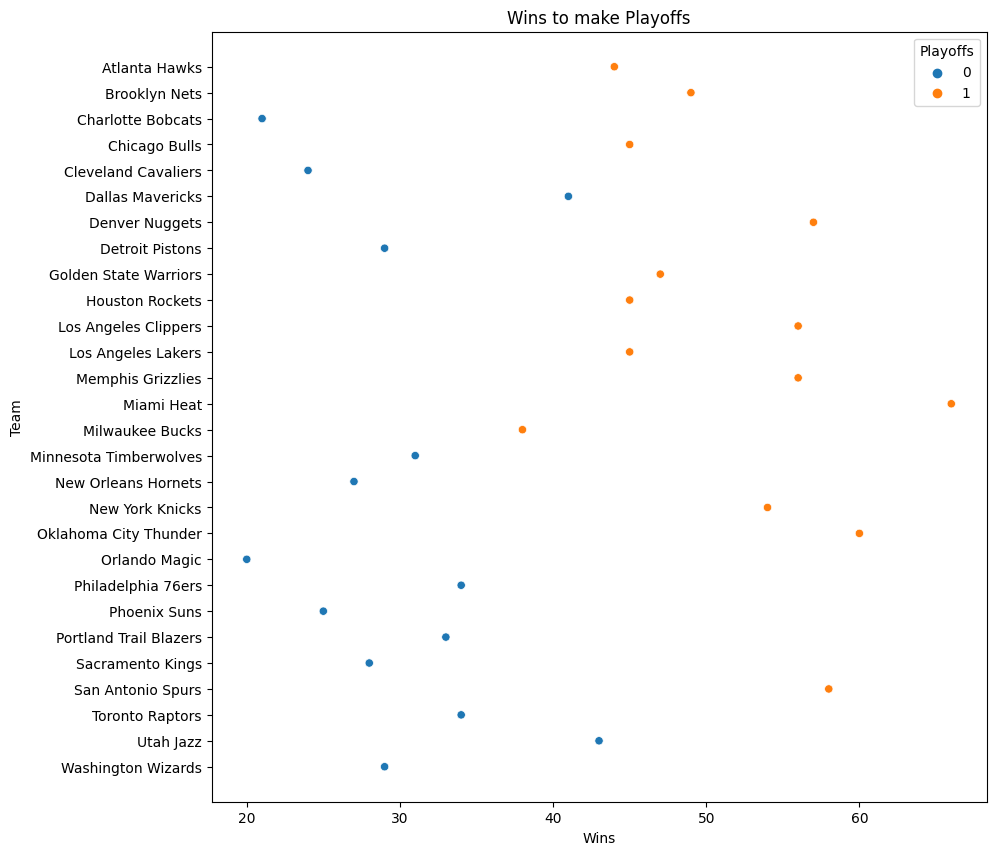

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='W',y='Team',hue='Playoffs', data=df_2)
plt.title('Wins to make Playoffs')
plt.xlabel('Wins')
plt.ylabel('Team')

#### Take a rough estimate, and now use that moving forward.  



In [ ]:
WINS_NEED_TO_MAKE_PLAYOFFS = 40

---

# Now do moneyball but for the NBA.

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

In [24]:
X_train = df_1.drop(['SeasonEnd', 'Playoffs', 'Team'], axis=1)
y_train = df_1['Playoffs']

test= df_2.drop(['SeasonEnd', 'Playoffs', 'Team'], axis=1)
test_true =df_2['Playoffs']

In [25]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Playoffs   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              341.7
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                        0.00
Time:                        22:27:41   Log-Likelihood:                         -151.70
No. Observations:                 835   AIC:                                      331.4
Df Residuals:                     821   BIC:                                      397.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
prediction = model.predict(test)

rmse_score = rmse(test_true, prediction)

print('Root mean squared error: ',  rmse_score)

Root mean squared error:  0.3085195043962176
